In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-and-series-rating-from-imdb/title.basics.tsv/data.tsv
/kaggle/input/movies-and-series-rating-from-imdb/title.episode.tsv/data.tsv
/kaggle/input/movies-and-series-rating-from-imdb/title.principals.tsv/data.tsv
/kaggle/input/movies-and-series-rating-from-imdb/title.ratings.tsv/data.tsv
/kaggle/input/movies-and-series-rating-from-imdb/name.basics.tsv/data.tsv
/kaggle/input/movies-and-series-rating-from-imdb/title.akas.tsv/data.tsv
/kaggle/input/movies-and-series-rating-from-imdb/title.crew.tsv/data.tsv


In [2]:
import pandas as pd
import numpy as np

In [3]:
ratings = pd.read_csv(
    "/kaggle/input/movies-and-series-rating-from-imdb/title.ratings.tsv/data.tsv",
    sep="\t"
)
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1966
1,tt0000002,5.8,264
2,tt0000003,6.5,1810
3,tt0000004,5.6,178
4,tt0000005,6.2,2610


In [4]:
ratings.shape

(1306113, 3)

In [5]:
basics = pd.read_csv(
    "/kaggle/input/movies-and-series-rating-from-imdb/title.basics.tsv/data.tsv",
    sep="\t"
)
basics.head()

/tmp/ipykernel_55/2172061170.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv(


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
basics.shape

(9811401, 9)

In [7]:
basics_subset = basics[
    ['tconst', 'titleType', 'runtimeMinutes']
]
df = pd.merge(
    ratings,
    basics_subset,
    on='tconst',
    how='inner'
)
df.head()

,tconst,averageRating,numVotes,titleType,runtimeMinutes
0,tt0000001,5.7,1966,short,1
1,tt0000002,5.8,264,short,5
2,tt0000003,6.5,1810,short,4
3,tt0000004,5.6,178,short,12
4,tt0000005,6.2,2610,short,1


In [8]:
df['titleType'].value_counts()

titleType
tvEpisode       638904
movie           290903
short           146929
tvSeries         87044
tvMovie          50410
video            49288
tvMiniSeries     14842
videoGame        14528
tvSpecial        11069
tvShort           2189
Name: count, dtype: int64

In [9]:
df = df[df['titleType'] == 'movie'].copy()
df['titleType'].value_counts()

titleType
movie    290903
Name: count, dtype: int64

In [10]:
df.dtypes

tconst             object
averageRating     float64
numVotes            int64
titleType          object
runtimeMinutes     object
dtype: object

In [11]:
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df = df.dropna(subset=['runtimeMinutes'])
df.dtypes

tconst             object
averageRating     float64
numVotes            int64
titleType          object
runtimeMinutes    float64
dtype: object

In [12]:
df['completed'] = (df['averageRating'] >= 7).astype(int)
df.dtypes

tconst             object
averageRating     float64
numVotes            int64
titleType          object
runtimeMinutes    float64
completed           int64
dtype: object

completed output label was not present in the data set so i used averageRating>=7 mins as completed. for understanding purposes

In [13]:
df_model = df[['runtimeMinutes', 'numVotes', 'completed']].copy()
X = df_model[['runtimeMinutes', 'numVotes']]
y = df_model['completed']

In [14]:
X.head()

,runtimeMinutes,numVotes
8,45.0,204
144,100.0,469
326,100.0,15
358,70.0,824
366,90.0,20


In [15]:
y.head()

8      0
144    0
326    0
358    0
366    0
Name: completed, dtype: int64

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [18]:
X_train.shape, X_test.shape

((210054, 2), (52514, 2))

In [19]:
y_train.value_counts(normalize=True)
# y_test.value_counts(normalize=True)

completed
0    0.716701
1    0.283299
Name: proportion, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

completed
0    0.716704
1    0.283296
Name: proportion, dtype: float64

In [21]:
y.value_counts(normalize=True)

completed
0    0.716702
1    0.283298
Name: proportion, dtype: float64

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=10,
    criterion='gini',
    random_state=42
)

In [23]:
dt1.fit(X_train, y_train)
y_pred1 = dt1.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, f1_score

acc1 = accuracy_score(y_test, y_pred1)
acc1

0.7233118787370987

In [25]:
f1_1 = f1_score(y_test, y_pred1)
f1_1

0.1504911131898971

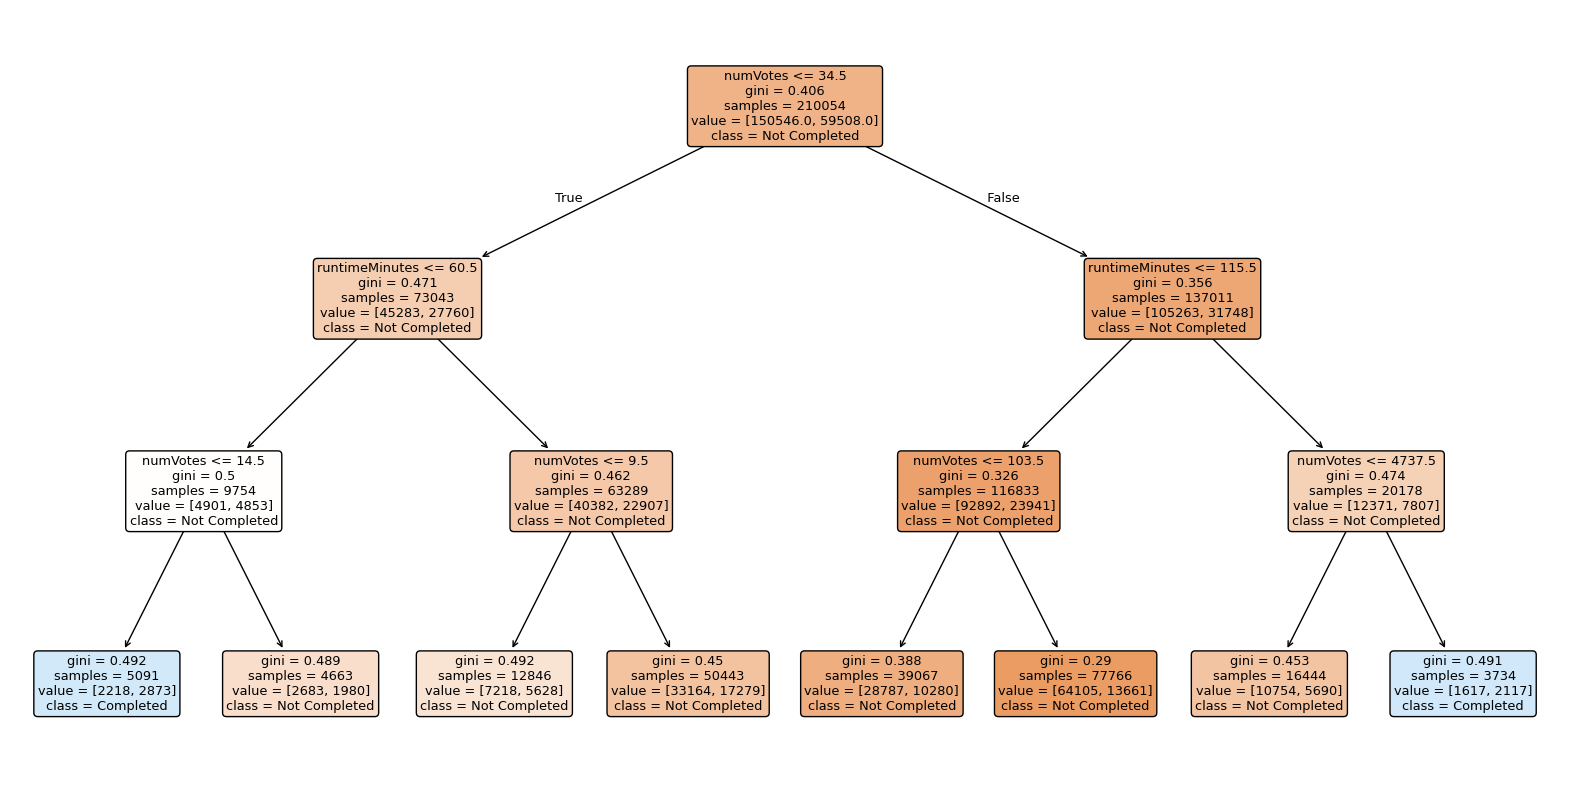

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(
    dt1,
    feature_names=['runtimeMinutes', 'numVotes'],
    class_names=['Not Completed', 'Completed'],
    filled=True,
    rounded=True
)

plt.show()

In [27]:
dt2 = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=5,
    criterion='entropy',
    random_state=42
)
dt2.fit(X_train, y_train)
y_pred2 = dt2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

acc2, f1_2

(0.7234070914422821, 0.16871744977966005)

In [28]:
dt3 = DecisionTreeClassifier(
    max_depth=None,        
    min_samples_split=2,   
    criterion='gini',
    random_state=42
)
dt3.fit(X_train, y_train)
y_pred3 = dt3.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)

acc3, f1_3

(0.6819324370644019, 0.2469002209297083)

In [29]:
results = pd.DataFrame({
    "Model": ["DT-1", "DT-2", "DT-3"],
    "max_depth": [3, 6, None],
    "min_samples_split": [10, 5, 2],
    "criterion": ["gini", "entropy", "gini"],
    "Accuracy": [acc1, acc2, acc3],
    "F1 Score": [f1_1, f1_2, f1_3]
})

results

,Model,max_depth,min_samples_split,criterion,Accuracy,F1 Score
0,DT-1,3.0,10,gini,0.723312,0.150491
1,DT-2,6.0,5,entropy,0.723407,0.168717
2,DT-3,NaN,2,gini,0.681932,0.246900


In [30]:
# random forest

In [31]:

def bootstrap_sample(X, y, rng):
    n = X.shape[0]
    idx = rng.integers(0, n, size=n)
    return X.iloc[idx], y.iloc[idx]

In [32]:
def majority_vote(pred_matrix):
    votes = pred_matrix.sum(axis=0)
    return (votes >= (pred_matrix.shape[0] / 2)).astype(int)

In [33]:
class ManualRandomForest:
    def __init__(self, n_estimators=25, max_features="sqrt",
                 max_depth=None, min_samples_split=2, criterion="gini",
                 random_state=42):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.random_state = random_state
        self.trees = []          # list of fitted DecisionTreeClassifier
        self.feature_sets = []   # list of feature-name lists used by each tree

    def _choose_features(self, all_features, rng):
        p = len(all_features)
        if self.max_features == "sqrt":
            k = max(1, int(np.sqrt(p)))
        elif self.max_features == "log2":
            k = max(1, int(np.log2(p)))
        elif isinstance(self.max_features, int):
            k = max(1, min(p, self.max_features))
        else:
            k = p  # use all features
        return list(rng.choice(all_features, size=k, replace=False))

    def fit(self, X, y):
        self.trees = []
        self.feature_sets = []
        rng = np.random.default_rng(self.random_state)
        all_features = list(X.columns)

        for _ in range(self.n_estimators):
            # 1) bootstraping rows
            Xb, yb = bootstrap_sample(X, y, rng)

            # sampling features
            feats = self._choose_features(all_features, rng)
            self.feature_sets.append(feats)

            # training
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                criterion=self.criterion,
                random_state=int(rng.integers(0, 1_000_000_000))
            )
            tree.fit(Xb[feats], yb)
            self.trees.append(tree)

        return self

    def predict(self, X):
        preds = []
        for tree, feats in zip(self.trees, self.feature_sets):
            preds.append(tree.predict(X[feats]))
        pred_matrix = np.vstack(preds)
        return majority_vote(pred_matrix)

In [34]:
rf = ManualRandomForest(
    n_estimators=50,
    max_features="sqrt",     # feature sampling
    max_depth=6,
    min_samples_split=5,
    criterion="gini",
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1  = f1_score(y_test, rf_pred)
rf_acc, rf_f1

(0.7184560307727463, 0.035991393362456804)

In [35]:
comparison = pd.DataFrame([
    {"Model": "Decision Tree", "Accuracy": acc1, "F1 Score": f1_1},
    {"Model": "Manual Random Forest", "Accuracy": rf_acc, "F1 Score": rf_f1},
])

comparison

,Model,Accuracy,F1 Score
0,Decision Tree,0.723312,0.150491
1,Manual Random Forest,0.718456,0.035991
